In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import bz2
import re

In [4]:
train=bz2.BZ2File("test.ft.txt.bz2")

In [5]:
train_line=train.readlines()

In [6]:
train_line=[x.decode('utf-8') for x in train_line]

In [7]:
# print(train_line[0])

__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"



In [8]:
#len(train_line)

In [9]:
train_label=[0 if x.split(' ')[0] == '__label__1' else 1 for x in train_line]

In [10]:
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_line]

In [69]:
# train_sentences[2]


In [70]:
#print(len(train_sentences))
#print(len(train_label))

In [71]:
df_train_reviews = pd.DataFrame({'reviews': train_sentences} )
df_train_score = pd.DataFrame({'score': train_label} )

In [72]:
df_train_reviews = df_train_reviews[:20000]
df_train_score = df_train_score[:20000]

In [73]:
# df_train_score['score'].value_counts()

In [74]:
# print(len(df_train_score))

In [75]:
# df_train_reviews.head()

In [76]:
# type(df_train_reviews)

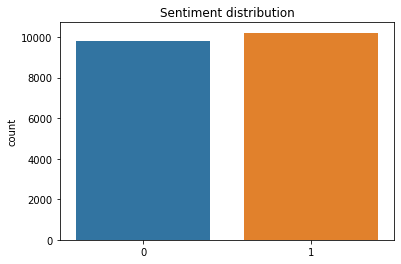

In [17]:
f = sns.countplot(x='score',data=df_train_score)
f.set_title("Sentiment distribution")
f.set_xticklabels([0, 1])
plt.xlabel("");

In [18]:
#df_train_reviews.head()

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [20]:
import nltk

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vipin3112/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
stopwords_set = set(stopwords.words("english"))
# print(stopwords_set)

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/vipin3112/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
corpus_train = []
for i in range(0, len(df_train_reviews)):
    review = re.sub("<.*?>", "", df_train_reviews['reviews'][i])
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = re.sub(r'[^\w\s2]',' ',review)
    review = re.sub('<br /><br />'," ",review)
    review = review.lower()
    review = review.split()
    del review[0]
    lemmatizer = WordNetLemmatizer() 
    review = [lemmatizer.lemmatize(words) for words in review if not words in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_train.append(review)

In [78]:
# corpus_train[2]

In [79]:
# print(corpus_train[0])

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train = cv.fit_transform(corpus_train)
# x_train.shape

In [100]:
# print(x_train.toarray())

In [101]:
#from sklearn.feature_extraction.text import CountVectorizer
#x_train=CountVectorizer().fit(corpus_train)

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,df_train_score,test_size=0.3,random_state=0)


In [103]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [104]:
model=MultinomialNB()
model.fit(x_train,y_train)

/home/vipin3112/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [105]:
# model.score(x_test,y_test)

In [106]:
# x_test.shape

In [107]:
score_predict=model.predict(x_test)

In [108]:
# score_predict.shape

In [109]:
# score_predict[:100]

In [110]:
accuracy_score(y_test,score_predict)

0.8306666666666667

In [111]:
ct=confusion_matrix(y_test,score_predict)

In [112]:
print(ct)

[[2425  446]
 [ 570 2559]]


In [113]:
print(classification_report(y_test,score_predict))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      2871
           1       0.85      0.82      0.83      3129

    accuracy                           0.83      6000
   macro avg       0.83      0.83      0.83      6000
weighted avg       0.83      0.83      0.83      6000



In [97]:
import pickle 

In [120]:
filename = 'NB_model.pkl'
pickle.dump(model, open(filename, 'wb'))
# joblib.dump(model, 'NB_sentimental_model.pkl')

In [121]:
pickle.dump(cv, open('cv', 'wb'))

In [115]:
nb_model = pickle.load(open(filename, 'rb'))

In [118]:
cv = pickle.load(open('cv', 'rb'))

In [87]:
# NB_model = open('NB_sentimental_model.pkl','rb')

In [119]:
# model = joblib.load(NB_model)